# CSV File

In [1]:
pip install lasio


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import missingno as msno

In [3]:
x = pd.read_csv('poro_perm_data.csv')

In [4]:
x.head()

,Depth (ft),Porosity (%),Permeability (mD),Facies
0,2490.5,20.091780,255.047037,'channel'
1,4684.0,15.575765,59.920915,'crevasse splay'
2,2476.0,35.793892,221.382181,'channel'
3,2574.0,41.695392,361.589232,'channel'
4,1390.0,24.448748,257.704298,'channel'


<AxesSubplot:>

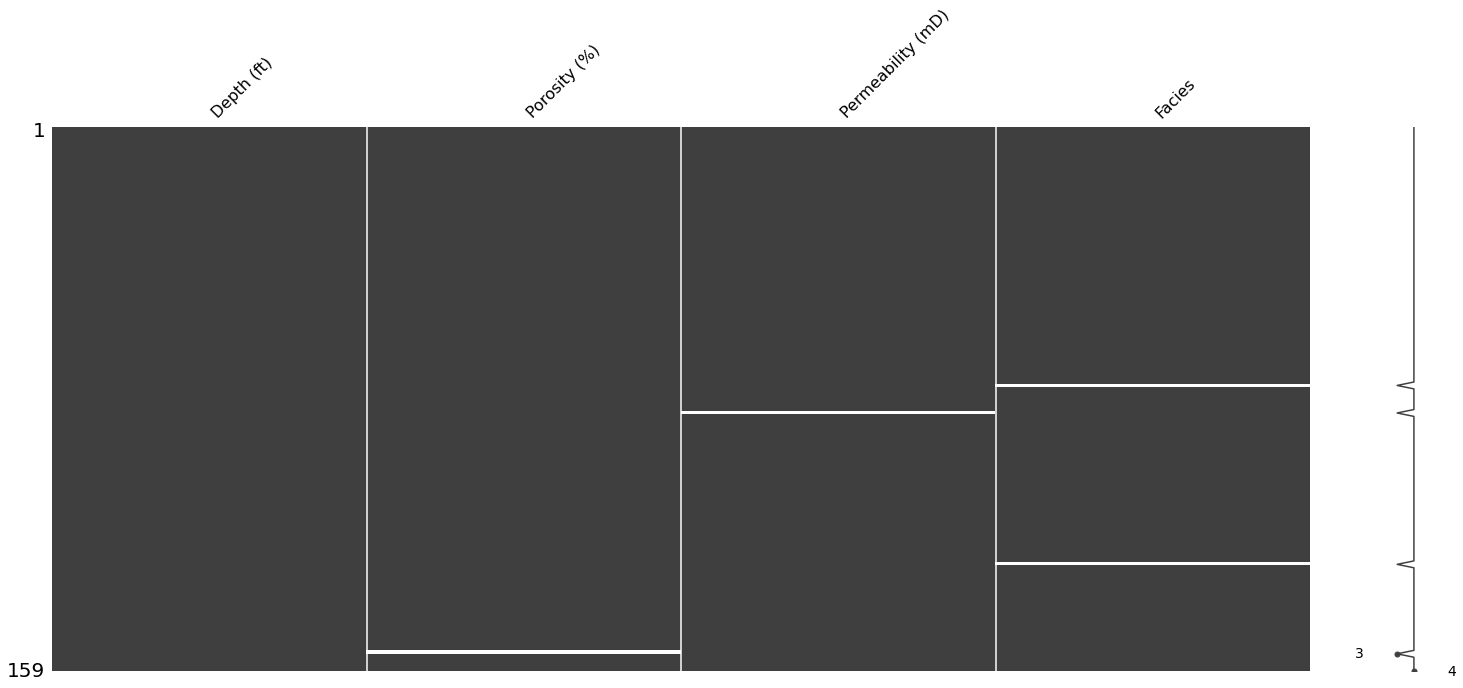

In [5]:
# visualize mssing values as a matrix 
msno.matrix(x)
# white gaps show missing values

In [6]:
# to quantify the number of missing values 
x.isnull().sum()

Depth (ft)           0
Porosity (%)         1
Permeability (mD)    1
Facies               2
dtype: int64

In [7]:
# removing rows with missing values 
x1 = x.copy()
x1.dropna(axis = 0, inplace = True )
x1.isnull().sum()

Depth (ft)           0
Porosity (%)         0
Permeability (mD)    0
Facies               0
dtype: int64

In [8]:
x1['Facies'] = x1['Facies'].map(lambda x: x.rstrip("'"))
x1['Facies'] = x1['Facies'].map(lambda x: x.lstrip("'"))


In [9]:
x1.head()

,Depth (ft),Porosity (%),Permeability (mD),Facies
0,2490.5,20.091780,255.047037,channel
1,4684.0,15.575765,59.920915,crevasse splay
2,2476.0,35.793892,221.382181,channel
3,2574.0,41.695392,361.589232,channel
4,1390.0,24.448748,257.704298,channel


<AxesSubplot:>

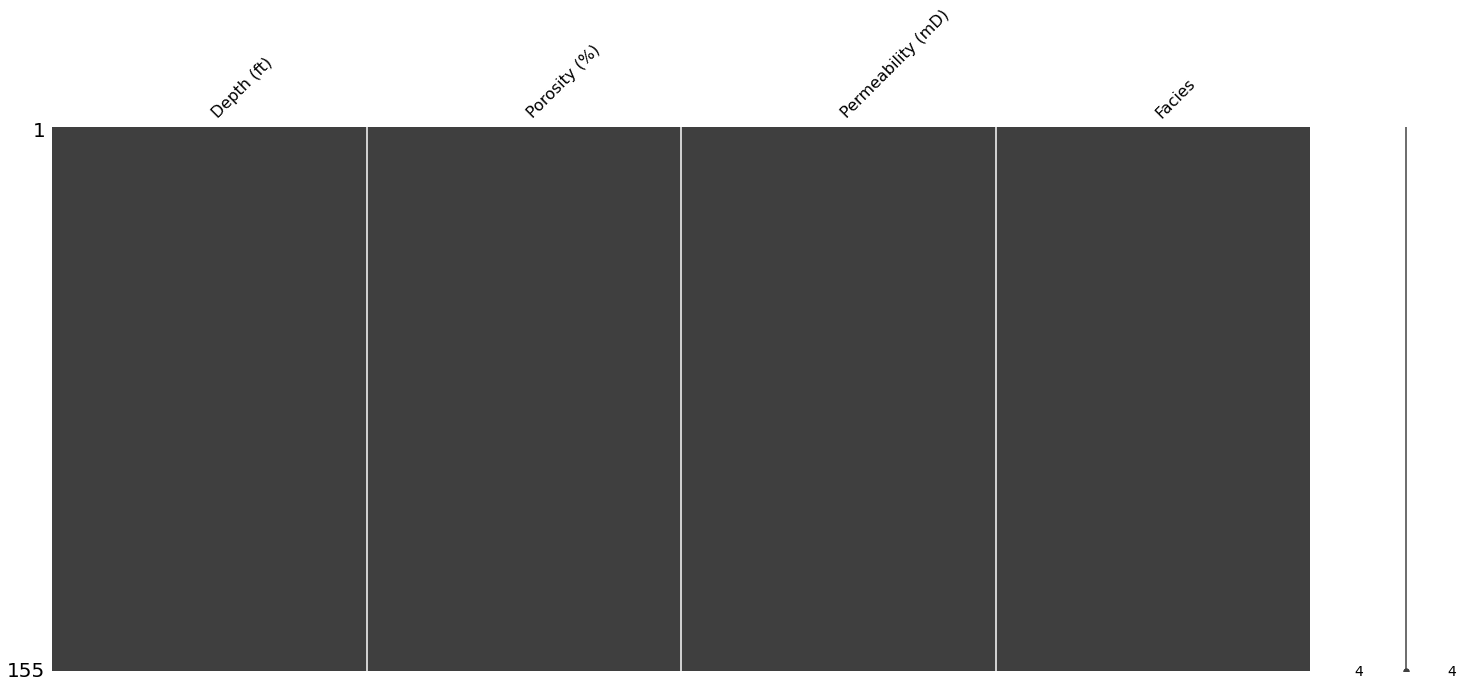

In [10]:
msno.matrix(x1)

In [11]:
x1.head()

,Depth (ft),Porosity (%),Permeability (mD),Facies
0,2490.5,20.091780,255.047037,channel
1,4684.0,15.575765,59.920915,crevasse splay
2,2476.0,35.793892,221.382181,channel
3,2574.0,41.695392,361.589232,channel
4,1390.0,24.448748,257.704298,channel


In [12]:
x1.describe()

,Depth (ft),Porosity (%),Permeability (mD)
count,155.000000,155.000000,155.000000
mean,2767.758065,19.255897,132.098692
std,1311.036247,9.935294,114.328735
min,363.000000,-10.622245,-18.584303
25%,1510.750000,12.051978,35.884149
50%,2500.500000,18.266211,73.313322
75%,4076.500000,25.985257,252.508263
max,4973.500000,41.695392,361.589232


In [13]:
dropvals1 = x1[(x1['Porosity (%)' ] <= 0)].index
x1.drop(dropvals1, inplace=True)

dropvals2 = x1[(x1['Porosity (%)' ] > 100)].index
x1.drop(dropvals2, inplace=True)

dropvals3 = x1[(x1['Permeability (mD)' ] <= 0)].index
x1.drop(dropvals3, inplace=True)

dropvals4 = x1[(x1['Depth (ft)' ] <= 0)].index
x1.drop(dropvals4, inplace=True)

In [14]:
#removing negative permeability and porosity values 
#x1.loc[x1['Porosity (%)'] <= 0, 'Porosity (%)']=np.nan
#x1.loc[x1['Permeability (mD)'] <= 0, 'Permeability (mD)']=np.nan
#x1.loc[x1['Porosity (%)'] > 100, 'Porosity (%)']=np.nan
#x1.loc[x1['Depth (ft)'] <= 0, 'Depth (ft)']=np.nan

In [15]:
x1.describe()

,Depth (ft),Porosity (%),Permeability (mD)
count,151.000000,151.000000,151.000000
mean,2752.970199,19.794294,135.361393
std,1307.828036,9.422574,113.973149
min,363.000000,0.456186,7.104823
25%,1510.750000,12.698669,38.261183
50%,2500.000000,19.754472,80.489707
75%,4076.500000,26.487597,256.204102
max,4973.500000,41.695392,361.589232


In [16]:
x1.isnull().sum()

Depth (ft)           0
Porosity (%)         0
Permeability (mD)    0
Facies               0
dtype: int64

# Lasio File

In [17]:
### Lasio File ###

import lasio
import numpy as np

In [18]:
las= lasio.read('1051661275.las')

In [19]:
file2 = las.df()

file2['DEPT']= file2.index

In [20]:
file2.head()

,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,DCAL,DPOR,GR,...,RLL3,RXORT,SP,DT,ITT,MCAL,MI,MN,SPOR,DEPT
DEPT,,,,,,,,,,,,,,,,,,,,,
295.0,0.0,0.0,2.9851,41.0609,43.5878,43.5878,43.4058,2.4652,37.7536,63.7645,...,1.1168,222.9643,18.5066,208.8350,0.0,3.9181,1.2855,0.4294,114.0276,295.0
295.5,0.0,0.0,0.0000,40.6871,43.3443,43.3443,43.2358,2.4661,37.0570,60.7369,...,1.1174,445.6642,17.3447,230.5808,0.0,3.9183,1.2765,0.4194,129.4065,295.5
296.0,0.0,0.0,0.0000,43.3649,45.1107,45.1107,44.4905,2.4683,36.1954,57.7684,...,1.1179,445.6190,16.1296,257.3757,0.0,3.9189,1.2658,0.4087,148.3562,296.0
296.5,0.0,0.0,0.0000,46.6181,47.3299,47.3299,46.1360,2.4701,35.5653,56.3093,...,1.1196,445.5707,14.7311,282.8377,0.0,3.9199,1.2541,0.3980,166.3633,296.5
297.0,0.0,0.0,2.9769,49.2579,49.1937,49.1937,47.5753,2.4713,35.3588,55.9928,...,1.1219,222.8898,13.1010,298.5848,1.0,3.9249,1.2416,0.3859,177.4999,297.0


<AxesSubplot:>

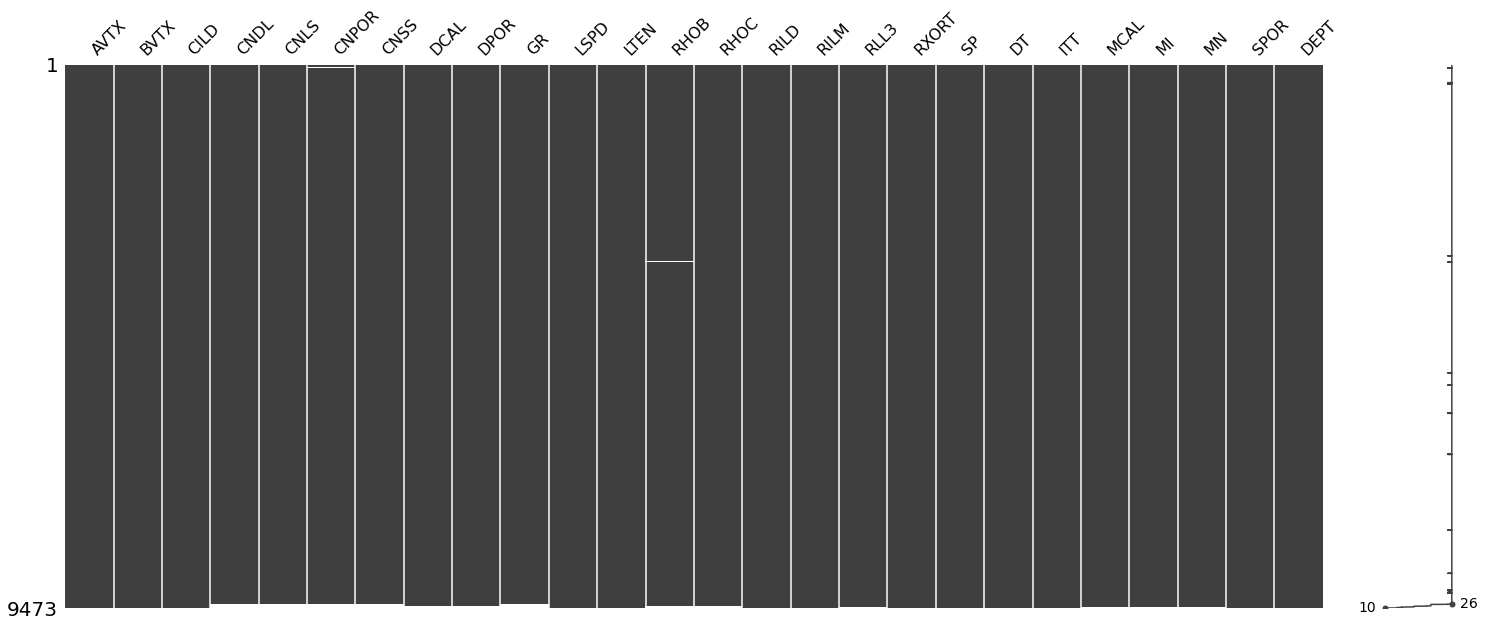

In [21]:
msno.matrix(file2)

In [22]:
file2.isnull().sum()

AVTX      0
BVTX      0
CILD      0
CNDL     69
CNLS     69
CNPOR    76
CNSS     69
DCAL     45
DPOR     38
GR       79
LSPD      0
LTEN      0
RHOB     45
RHOC     38
RILD      0
RILM      0
RLL3     16
RXORT     0
SP        0
DT        6
ITT       6
MCAL     24
MI       23
MN       23
SPOR      6
DEPT      0
dtype: int64

In [23]:
file2['DT'] = file2['DT'].replace(np.nan, file2['DT'].mean(), regex = True)
file2['ITT'] = file2['ITT'].replace(np.nan, file2['ITT'].mean(), regex = True)
file2['CNDL'] = file2['CNDL'].replace(np.nan, file2['CNDL'].mean(), regex = True)
file2['CNLS'] = file2['CNLS'].replace(np.nan, file2['CNLS'].mean(), regex = True)
file2['CNPOR'] = file2['CNPOR'].replace(np.nan, file2['CNPOR'].mean(), regex = True)
file2['CNSS'] = file2['CNSS'].replace(np.nan, file2['CNSS'].mean(), regex = True)
file2['GR'] = file2['GR'].replace(np.nan, file2['GR'].mean(), regex = True)
file2['RLL3'] = file2['RLL3'].replace(np.nan, file2['RLL3'].mean(), regex = True)
file2['MCAL'] = file2['MCAL'].replace(np.nan, file2['MCAL'].mean(), regex = True)
file2['MI'] = file2['MI'].replace(np.nan, file2['MI'].mean(), regex = True)
file2['MN'] = file2['MN'].replace(np.nan, file2['MN'].mean(), regex = True)
file2['SPOR'] = file2['SPOR'].replace(np.nan, file2['SPOR'].mean(), regex = True)
file2['DCAL'] = file2['DCAL'].replace(np.nan, file2['DCAL'].mean(), regex = True)
file2['RHOB'] = file2['RHOB'].replace(np.nan, file2['RHOB'].mean(), regex = True)
file2['RHOC'] = file2['RHOC'].replace(np.nan, file2['RHOC'].mean(), regex = True)

In [24]:
file2['DPOR'] = file2['DPOR'].replace(np.nan, file2['DPOR'].mean(), regex = True)

In [25]:
file2.isnull().sum()

AVTX     0
BVTX     0
CILD     0
CNDL     0
CNLS     0
CNPOR    0
CNSS     0
DCAL     0
DPOR     0
GR       0
LSPD     0
LTEN     0
RHOB     0
RHOC     0
RILD     0
RILM     0
RLL3     0
RXORT    0
SP       0
DT       0
ITT      0
MCAL     0
MI       0
MN       0
SPOR     0
DEPT     0
dtype: int64

In [26]:
file2.describe()

,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,DCAL,DPOR,GR,...,RLL3,RXORT,SP,DT,ITT,MCAL,MI,MN,SPOR,DEPT
count,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,...,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000
mean,0.011190,0.020268,226.043814,21.776635,27.550279,27.516487,29.787002,8.323699,22.185870,112.552241,...,23.511714,-10.239401,-52.374910,91.189626,0.074575,8.159196,13.304449,10.374721,30.827176,2663.000000
std,0.113868,0.153131,180.250561,16.908171,14.026486,14.755793,13.000210,1.169708,15.876235,1778.375855,...,70.302416,72.395877,28.473061,28.464001,0.287212,2.590302,17.024174,10.116687,20.130128,1367.381942
min,0.000000,0.000000,0.000000,-6.059300,-1.015300,-50.985100,2.986300,-47.789300,-76.141800,-60.672900,...,0.010000,-154.138400,-128.128800,-1.997400,0.000000,-131.587700,0.000100,0.000200,-35.076000,295.000000
25%,0.000000,0.000000,133.417500,7.413100,15.873000,15.805500,19.680700,8.042900,9.867300,54.538100,...,6.299300,-33.613300,-73.149200,70.388000,0.000000,7.921300,5.253100,4.701500,16.116000,1479.000000
50%,0.000000,0.000000,212.952800,18.665700,27.550279,27.516487,29.953500,8.173400,22.091200,79.716300,...,8.142400,-22.329700,-43.713000,82.763200,0.000000,8.055300,7.822700,7.171900,24.867900,2663.000000
75%,0.000000,0.000000,281.955500,36.244300,40.521300,40.499400,41.336200,8.411200,29.520100,98.608700,...,12.080200,-13.169300,-29.671400,114.817600,0.000000,8.142400,13.608100,12.043600,47.537200,3847.000000
max,2.000000,2.000000,3229.541500,600.697300,60.814100,430.722200,420.907300,10.905500,158.479500,100000.000000,...,1479.427500,445.664200,18.506600,299.414200,2.000000,14.287400,126.055100,70.499700,178.086400,5031.000000


In [27]:
file2.head()

,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,DCAL,DPOR,GR,...,RLL3,RXORT,SP,DT,ITT,MCAL,MI,MN,SPOR,DEPT
DEPT,,,,,,,,,,,,,,,,,,,,,
295.0,0.0,0.0,2.9851,41.0609,43.5878,43.5878,43.4058,2.4652,37.7536,63.7645,...,1.1168,222.9643,18.5066,208.8350,0.0,3.9181,1.2855,0.4294,114.0276,295.0
295.5,0.0,0.0,0.0000,40.6871,43.3443,43.3443,43.2358,2.4661,37.0570,60.7369,...,1.1174,445.6642,17.3447,230.5808,0.0,3.9183,1.2765,0.4194,129.4065,295.5
296.0,0.0,0.0,0.0000,43.3649,45.1107,45.1107,44.4905,2.4683,36.1954,57.7684,...,1.1179,445.6190,16.1296,257.3757,0.0,3.9189,1.2658,0.4087,148.3562,296.0
296.5,0.0,0.0,0.0000,46.6181,47.3299,47.3299,46.1360,2.4701,35.5653,56.3093,...,1.1196,445.5707,14.7311,282.8377,0.0,3.9199,1.2541,0.3980,166.3633,296.5
297.0,0.0,0.0,2.9769,49.2579,49.1937,49.1937,47.5753,2.4713,35.3588,55.9928,...,1.1219,222.8898,13.1010,298.5848,1.0,3.9249,1.2416,0.3859,177.4999,297.0


<AxesSubplot:>

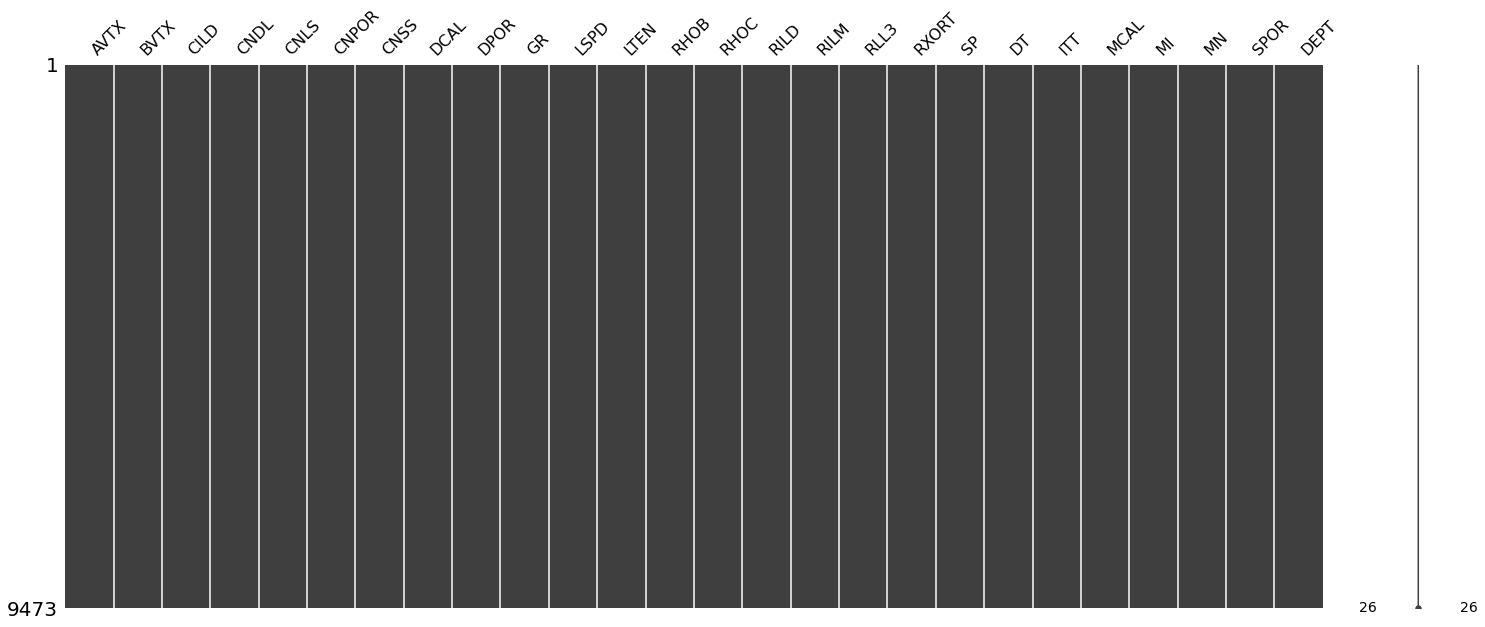

In [28]:
msno.matrix(file2)

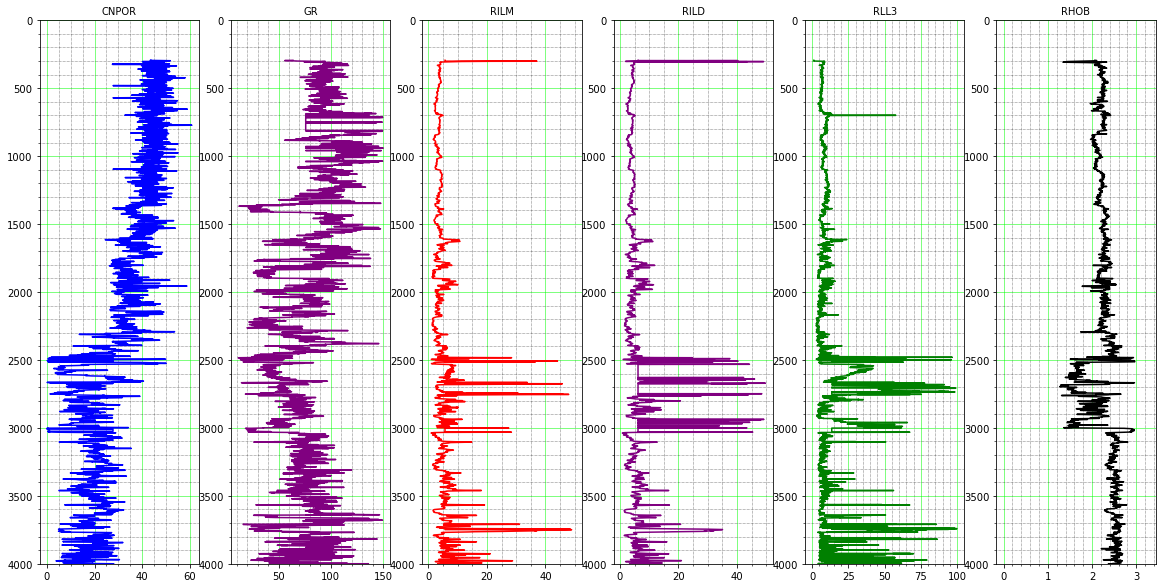

In [66]:
def well_log_display(df, column_depth, column_list, 
                     column_semilog=None, min_depth=None, max_depth=None, 
                     column_min=None, column_max=None, colors=None, 
                     fm_tops=None, fm_depths=None, 
                     tight_layout=1, title_size=10):
  """
  Display log side-by-side style
  Input:
  df is your dataframe
  specify min_depth and max_depth as the upper and lower depth limit
  column_depth is the column name of your depth
  column_list is the LIST of column names that you will display
  column_semilog is specific for resistivity column; if your resistivities are 
    in column 3, specify as: column_semilog=2. Default is None, so if you don't 
    specify, the resistivity will be plotted in normal axis instead
    
  column_min is list of minimum values for the x-axes.
  column_max is list of maximum values for the x-axes.
  
  colors is the list of colors specified for each log names. Default is None,
    so if don't specify, the colors will be Matplotlib default (blue)
  fm_tops and fm_depths are the list of formation top names and depths.
    Default is None, so no tops are shown. Specify both lists, if you want
    to show the tops
  """
  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  import random

  if column_semilog==None:
    # column semilog not defined, RT will be plotted in normal axis
    logs = column_list

    # create the subplots; ncols equals the number of logs
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

    # looping each log to display in the subplots
    if colors==None:
      # color is None (default)
      for i in range(len(logs)):
        # normal axis plot
        ax[i].plot(df[logs[i]], df[column_depth])
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)          
        ax[i].invert_yaxis()    

    else:
      # colors are defined (as list)
      for i in range(len(logs)):
        # normal axis plot
        ax[i].plot(df[logs[i]], df[column_depth], color=colors[i])
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')        
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])       
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)           
        ax[i].invert_yaxis()    


  else:
    # column semilog is defined, RT will be plotted in semilog axis
    logs = column_list

    # create the subplots; ncols equals the number of logs
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

    # looping each log to display in the subplots
    if colors==None:
      # color is None (default)
      for i in range(len(logs)):
        if i == column_semilog:
          # for resistivity, semilog plot
          ax[i].semilogx(df[logs[i]], df[column_depth])
        else:
          # for non-resistivity, normal plot
          ax[i].plot(df[logs[i]], df[column_depth])
        
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')        
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])        
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)          
        ax[i].invert_yaxis()    

    else:
      # colors are defined (as list)
      for i in range(len(logs)):
        if i == column_semilog:
          # for resistivity, semilog plot
          ax[i].semilogx(df[logs[i]], df[column_depth], color=colors[i])     
        else:
          # for non-resistivity, normal plot
          ax[i].plot(df[logs[i]], df[column_depth], color=colors[i])
        
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')  
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])   
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)
        ax[i].invert_yaxis() 

  if fm_tops!=None and fm_depths!=None:
    # Formation tops and depths are specified, they will be shown

    # produce colors
    rgb = []
    for j in range(len(fm_tops)):
      _ = (random.random(), random.random(), random.random())
      rgb.append(_)

    for i in range(len(logs)):
      for j in range(len(fm_tops)):
        # rgb = (random.random(), random.random(), random.random())
        ax[i].axhline(y=fm_depths[j], linestyle=":", c=rgb[j], label=fm_tops[j])  
        # y = fm_depths[j] / (max_depth - min_depth)    
        # ax[i].text(0.5, y, fm_tops[j], fontsize=5, va='center', ha='center', backgroundcolor='w')

  # plt.legend()
  # plt.legend(loc='upper center', bbox_to_anchor=(-3, -0.05),
  #            fancybox=True, shadow=True, ncol=5)  
  
  plt.show() 

column_depth = 'DEPT'
column_list = ['CNPOR', 'GR', 'RILM', 'RILD', 'RLL3', 'RHOB' ]
column_semilog = 6
column_min=None
column_max=None
min_depth= 0
max_depth= 4000
colors=["blue","purple", "red","purple","green","black"]
well_log_display(file2, column_depth, column_list, column_semilog, min_depth, max_depth, column_min, column_max, colors)

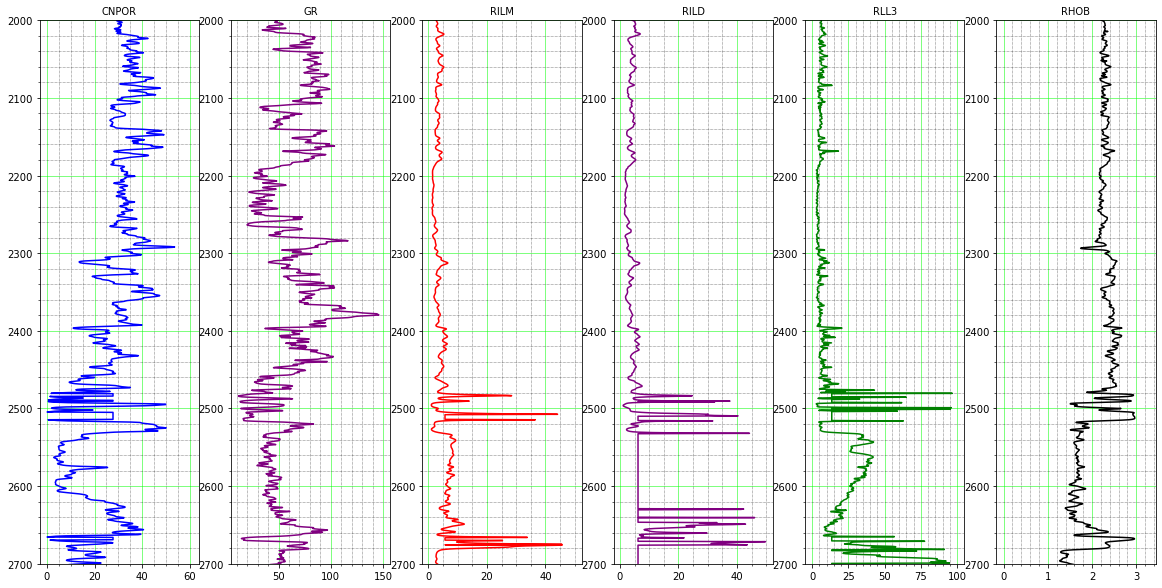

In [65]:
column_depth = 'DEPT'
column_list = ['CNPOR', 'GR', 'RILM', 'RILD', 'RLL3', 'RHOB' ]
column_semilog = 6
column_min=None
column_max=None
min_depth= 2000
max_depth= 2700
colors=["blue","purple", "red","purple","green","black"]
well_log_display(file2, column_depth, column_list, column_semilog, min_depth, max_depth, column_min, column_max, colors)

In [30]:
file2['RILD'].describe()

count      9473.000000
mean       4819.230141
std       21378.642098
min           0.309600
25%           3.546700
50%           4.695900
75%           7.495300
max      100000.000000
Name: RILD, dtype: float64

In [56]:
# removing rows with values that are outside the acceptable range 

file2.loc[file2['CNPOR'] < 0, 'CNPOR']=np.nan
file2.loc[file2['CNPOR'] >= 100, 'CNPOR']=np.nan
file2.loc[file2['DPOR'] < 0, 'DPOR']=np.nan

file2.loc[file2['GR'] < 0, 'GR']=np.nan
file2.loc[file2['GR'] > 150, 'GR']=np.nan

file2.loc[file2['RILM'] > 1000, 'RILM']=np.nan
file2.loc[file2['RILD']>1000,'RILD']= np.nan
file2.loc[file2['RLL3']>1000,'RLL3']= np.nan
file2.loc[file2['RHOB']<0,'RHOB']= np.nan
file2.loc[file2['RHOB']>= 3.5,'RHOB']= np.nan

<AxesSubplot:>

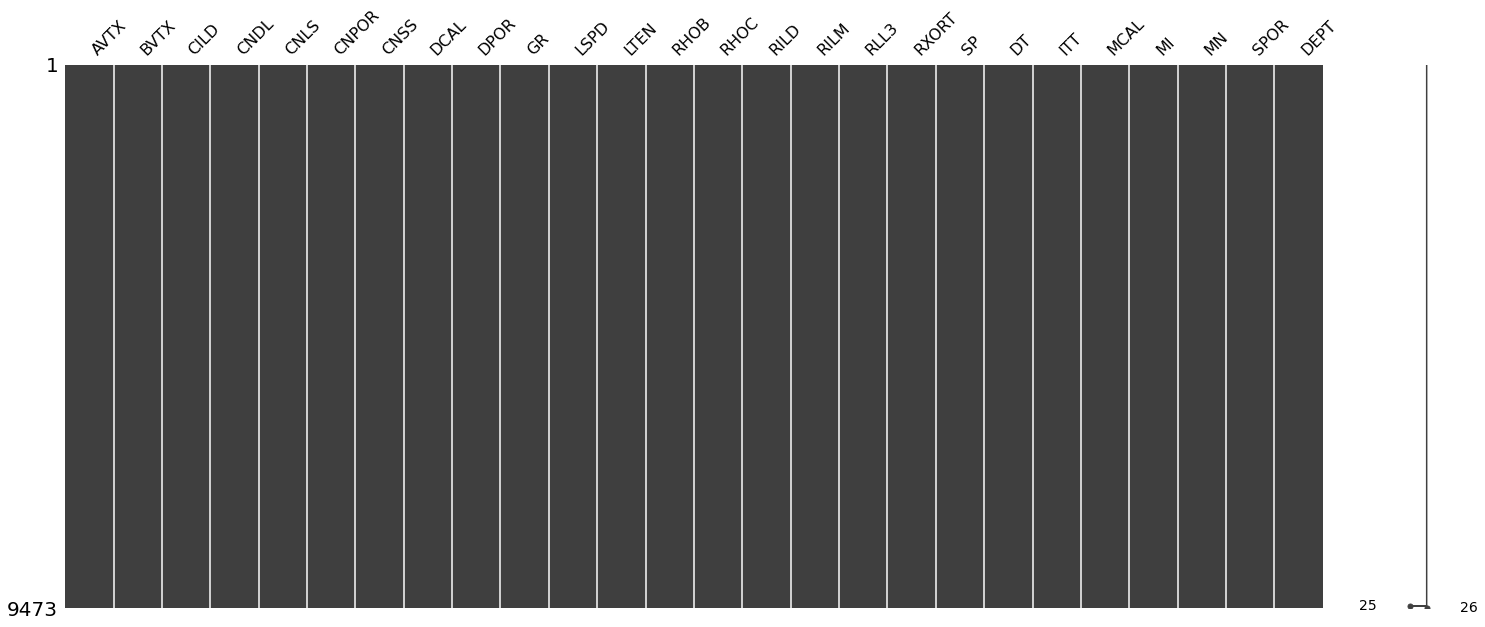

In [57]:
msno.matrix(file2)

In [58]:

file2['CNPOR'] = file2['CNPOR'].replace(np.nan, file2['CNPOR'].mean(), regex = True)

file2['GR'] = file2['GR'].replace(np.nan, file2['GR'].mean(), regex = True)

file2['RLL3'] = file2['RLL3'].replace(np.nan, file2['RLL3'].mean(), regex = True)

file2['RILD'] = file2['RILD'].replace(np.nan, file2['RILD'].mean(), regex = True)

file2['DPOR'] = file2['DPOR'].replace(np.nan, file2['DPOR'].mean(), regex = True)

file2['RILM'] = file2['RILM'].replace(np.nan, file2['RILM'].mean(), regex = True)

file2['RHOB'] = file2['RHOB'].replace(np.nan, file2['RHOB'].mean(), regex = True)

file2['CNDL'] = file2['CNDL'].replace(np.nan, file2['CNDL'].mean(), regex = True)

file2['CNLS'] = file2['CNLS'].replace(np.nan, file2['CNLS'].mean(), regex = True)

file2['CNSS'] = file2['CNSS'].replace(np.nan, file2['CNSS'].mean(), regex = True)

file2['DCAL'] = file2['DCAL'].replace(np.nan, file2['DCAL'].mean(), regex = True)

file2['RHOC'] = file2['RHOC'].replace(np.nan, file2['RHOC'].mean(), regex = True)

file2['MCAL'] = file2['MCAL'].replace(np.nan, file2['MCAL'].mean(), regex = True)

file2['MI'] = file2['MI'].replace(np.nan, file2['MI'].mean(), regex = True)

file2['MN'] = file2['MN'].replace(np.nan, file2['MN'].mean(), regex = True)

file2['DT'] = file2['DT'].replace(np.nan, file2['DT'].mean(), regex = True)

file2['ITT'] = file2['ITT'].replace(np.nan, file2['ITT'].mean(), regex = True)

file2['SPOR'] = file2['SPOR'].replace(np.nan, file2['SPOR'].mean(), regex = True)

In [59]:
file2.isnull().sum()

AVTX     0
BVTX     0
CILD     0
CNDL     0
CNLS     0
CNPOR    0
CNSS     0
DCAL     0
DPOR     0
GR       0
LSPD     0
LTEN     0
RHOB     0
RHOC     0
RILD     0
RILM     0
RLL3     0
RXORT    0
SP       0
DT       0
ITT      0
MCAL     0
MI       0
MN       0
SPOR     0
DEPT     0
dtype: int64

<AxesSubplot:>

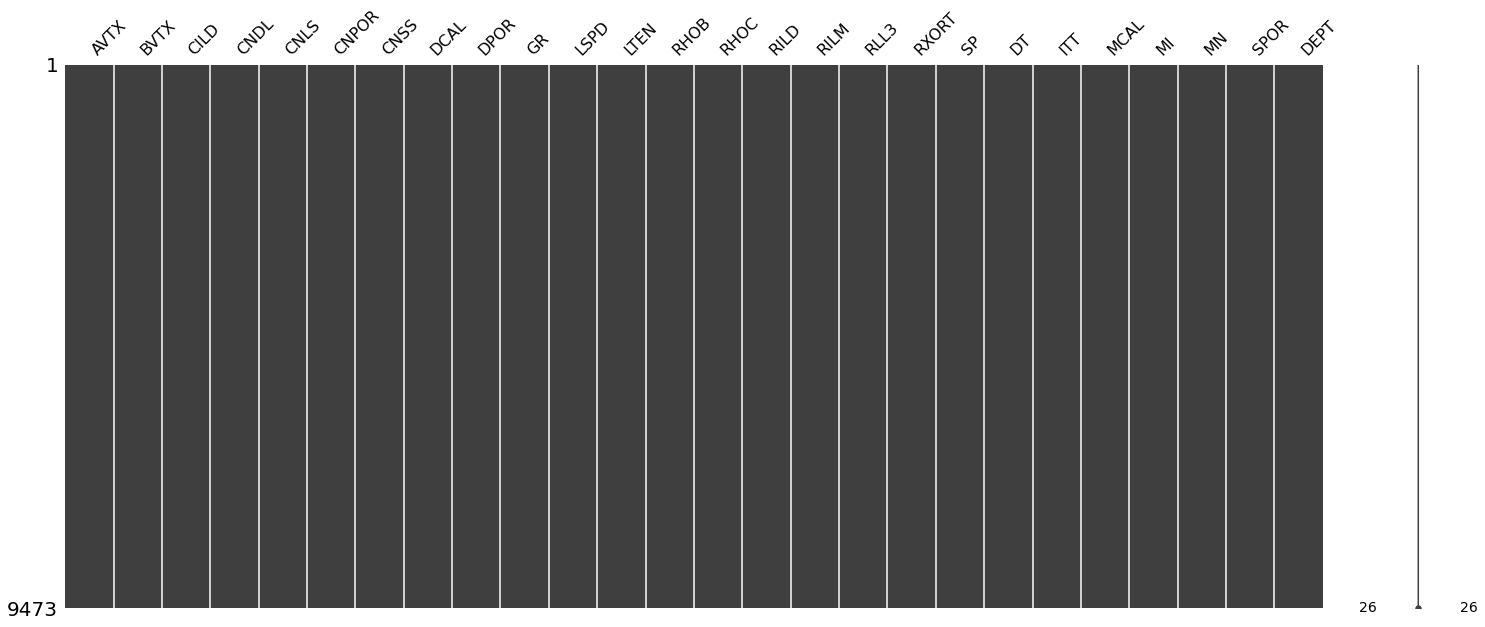

In [60]:
msno.matrix(file2)

In [69]:
def triple_combo(df, column_depth, column_GR, column_resistivity, 
                 column_NPHI, column_RHOB, min_depth, max_depth, 
                 min_GR=0, max_GR=150, sand_GR_line=60,
                 min_resistivity=1, max_resistivity=100, 
                 color_GR='black', color_resistivity='green', 
                 color_RHOB='red', color_NPHI='blue',
                 figsize=(6,10), tight_layout=1, 
                 title_size=15, title_height=1.05):
  """
  Producing Triple Combo log
  Input:
  df is your dataframe
  column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB
  are column names that appear in your dataframe (originally from the LAS file)
  specify your depth limits; min_depth and max_depth
  input variables other than above are default. You can specify
  the values yourselves. 
  Output:
  Fill colors; gold (sand), lime green (non-sand), blue (water-zone), orange (HC-zone)
  """
  
  import matplotlib.pyplot as plt
  from matplotlib.ticker import AutoMinorLocator  
  import numpy as np

  fig, ax=plt.subplots(1,3,figsize=(8,10))
  fig.suptitle('Triple Combo Log', size=title_size, y=title_height)

  ax[0].minorticks_on()
  ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  ax[0].grid(which='minor', linestyle=':', linewidth='1', color='black')

  ax[1].minorticks_on()
  ax[1].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  ax[1].grid(which='minor', linestyle=':', linewidth='1', color='black')

  ax[2].minorticks_on()
  ax[2].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  ax[2].grid(which='minor', linestyle=':', linewidth='1', color='black')  

  # First track: GR
  ax[0].get_xaxis().set_visible(False)
  ax[0].invert_yaxis()   

  gr=ax[0].twiny()
  gr.set_xlim(min_GR,max_GR)
  gr.set_xlabel('GR',color=color_GR)
  gr.set_ylim(max_depth, min_depth)
  gr.spines['top'].set_position(('outward',10))
  gr.tick_params(axis='x',colors=color_GR)
  gr.plot(df[column_GR], df[column_depth], color=color_GR)  

  gr.minorticks_on()
  gr.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  gr.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black') 

  gr.fill_betweenx(df[column_depth], sand_GR_line, df[column_GR], where=(sand_GR_line>=df[column_GR]), color = 'gold', linewidth=0) # sand
  gr.fill_betweenx(df[column_depth], sand_GR_line, df[column_GR], where=(sand_GR_line<df[column_GR]), color = 'lime', linewidth=0) # shale

  # Second track: Resistivity
  ax[1].get_xaxis().set_visible(False)
  ax[1].invert_yaxis()   

  res=ax[1].twiny()
  res.set_xlim(min_resistivity,max_resistivity)
  res.set_xlabel('Resistivity',color=color_resistivity)
  res.set_ylim(max_depth, min_depth)
  res.spines['top'].set_position(('outward',10))
  res.tick_params(axis='x',colors=color_resistivity)
  res.semilogx(df[column_resistivity], df[column_depth], color=color_resistivity)    

  res.minorticks_on()
  res.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  res.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')   

  # Third track: NPHI and RHOB
  ax[2].get_xaxis().set_visible(False)
  ax[2].invert_yaxis()  

  ## NPHI curve 
  nphi=ax[2].twiny()
  nphi.set_xlim(0,40)
  nphi.invert_xaxis()
  nphi.set_xlabel('NPHI',color='blue')
  nphi.set_ylim(max_depth, min_depth)
  nphi.spines['top'].set_position(('outward',10))
  nphi.tick_params(axis='x',colors='blue')
  nphi.plot(df[column_NPHI], df[column_depth], color=color_NPHI)

  nphi.minorticks_on()
  nphi.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  nphi.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')     

  ## RHOB curve 
  rhob=ax[2].twiny()
  rhob.set_xlim(0,5)
  rhob.set_xlabel('RHOB',color='red')
  rhob.set_ylim(max_depth, min_depth)
  rhob.spines['top'].set_position(('outward',50))
  rhob.tick_params(axis='x',colors='red')
  rhob.plot(df[column_RHOB], df[column_depth], color=color_RHOB)

  # solution to produce fill between can be found here:
  # https://stackoverflow.com/questions/57766457/how-to-plot-fill-betweenx-to-fill-the-area-between-y1-and-y2-with-different-scal
  x2p, _ = (rhob.transData + nphi.transData.inverted()).transform(np.c_[df[column_RHOB], df[column_depth]]).T
  nphi.autoscale(False)
  nphi.fill_betweenx(df[column_depth], df[column_NPHI], x2p, color="orange", alpha=0.4, where=(x2p > df[column_NPHI])) # hydrocarbon
  nphi.fill_betweenx(df[column_depth], df[column_NPHI], x2p, color="blue", alpha=0.4, where=(x2p < df[column_NPHI])) # water

  res.minorticks_on()
  res.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  res.grid(which='minor', linestyle=':', linewidth='1', color='black')
    
  plt.show()

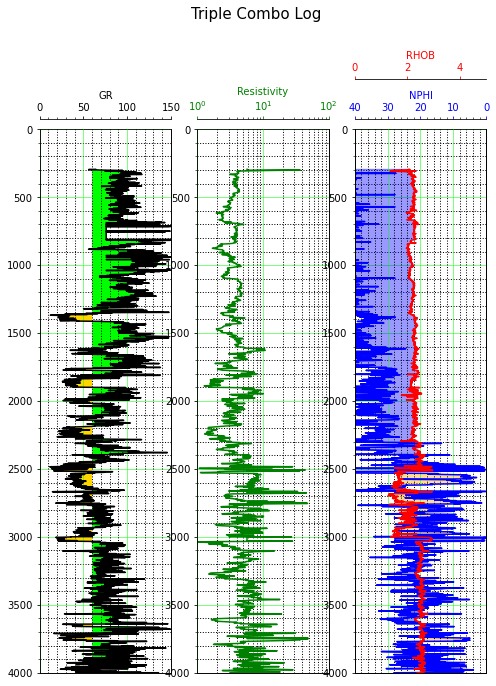

In [70]:
df = file2
column_depth = 'DEPT'
column_GR = 'GR'
column_resistivity = 'RILM'
column_NPHI = 'CNPOR'
column_RHOB  = 'RHOB'
min_depth= 0
max_depth= 4000
triple_combo(df, column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB, min_depth, max_depth)

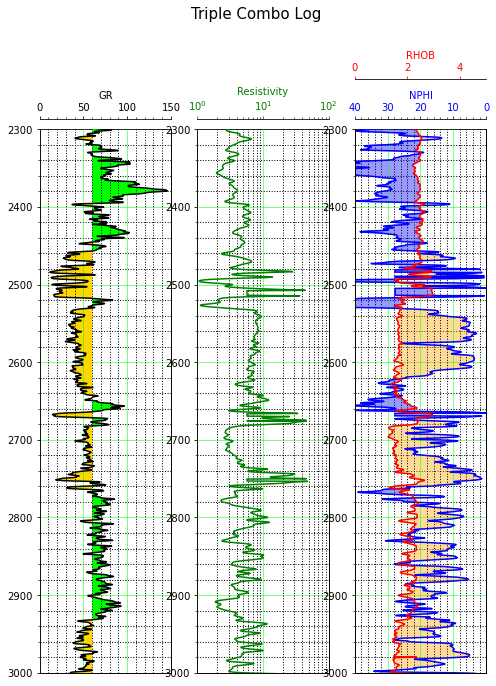

In [71]:
df = file2
column_depth = 'DEPT'
column_GR = 'GR'
column_resistivity = 'RILM'
column_NPHI = 'CNPOR'
column_RHOB  = 'RHOB'
min_depth= 2300
max_depth= 3000
triple_combo(df, column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB, min_depth, max_depth)

In [39]:
#Heat Maps 

file2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9473 entries, 295.0 to 5031.0
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AVTX    9473 non-null   float64
 1   BVTX    9473 non-null   float64
 2   CILD    9473 non-null   float64
 3   CNDL    9473 non-null   float64
 4   CNLS    9473 non-null   float64
 5   CNPOR   9473 non-null   float64
 6   CNSS    9473 non-null   float64
 7   DCAL    9473 non-null   float64
 8   DPOR    9473 non-null   float64
 9   GR      9473 non-null   float64
 10  LSPD    9473 non-null   float64
 11  LTEN    9473 non-null   float64
 12  RHOB    9473 non-null   float64
 13  RHOC    9473 non-null   float64
 14  RILD    9473 non-null   float64
 15  RILM    9473 non-null   float64
 16  RLL3    9473 non-null   float64
 17  RXORT   9473 non-null   float64
 18  SP      9473 non-null   float64
 19  DT      9473 non-null   float64
 20  ITT     9473 non-null   float64
 21  MCAL    9473 non-null   float

In [40]:
file2.corr()

,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,DCAL,DPOR,GR,...,RLL3,RXORT,SP,DT,ITT,MCAL,MI,MN,SPOR,DEPT
AVTX,1.000000,-0.006953,-0.017097,0.018852,-0.012655,-0.012276,-0.012576,0.023532,0.027774,-0.013295,...,0.027671,0.039777,-0.015676,-0.011027,0.013219,0.017852,0.012379,0.005988,-0.011027,-0.000003
BVTX,-0.006953,1.000000,-0.018372,-0.007777,-0.008777,-0.007918,-0.009071,0.020272,0.020256,0.000973,...,0.014044,0.023029,-0.008688,-0.005294,-0.012767,0.013925,0.006270,0.001635,-0.005294,-0.000669
CILD,-0.017097,-0.018372,1.000000,0.321946,0.387666,0.377230,0.377641,-0.118627,0.010589,0.144224,...,-0.390365,-0.352388,0.045008,0.289061,0.029220,-0.098234,-0.273649,-0.275419,0.289061,-0.143249
CNDL,0.018852,-0.007777,0.321946,1.000000,0.919618,0.913603,0.868707,-0.039095,0.350156,0.508999,...,-0.415124,-0.169192,0.615671,0.844673,0.080114,-0.064365,-0.439470,-0.493361,0.844673,-0.750986
CNLS,-0.012655,-0.008777,0.387666,0.919618,1.000000,0.984649,0.952970,-0.050112,0.365342,0.569374,...,-0.510676,-0.185764,0.645376,0.887670,0.072607,-0.068964,-0.547350,-0.604171,0.887670,-0.775869
CNPOR,-0.012276,-0.007918,0.377230,0.913603,0.984649,1.000000,0.936665,-0.053062,0.369664,0.548711,...,-0.518336,-0.189745,0.639523,0.879621,0.071843,-0.070417,-0.514395,-0.573038,0.879621,-0.785403
CNSS,-0.012576,-0.009071,0.377641,0.868707,0.952970,0.936665,1.000000,-0.049491,0.344685,0.540584,...,-0.500450,-0.178042,0.613332,0.839502,0.067013,-0.065485,-0.537261,-0.591113,0.839502,-0.733009
DCAL,0.023532,0.020272,-0.118627,-0.039095,-0.050112,-0.053062,-0.049491,1.000000,0.326979,-0.064114,...,0.134897,0.367485,-0.165860,-0.029373,-0.007999,0.198799,-0.120491,-0.162958,-0.029373,-0.075124
DPOR,0.027774,0.020256,0.010589,0.350156,0.365342,0.369664,0.344685,0.326979,1.000000,0.037895,...,-0.030002,0.566490,-0.052009,0.411610,0.047132,0.202584,-0.496505,-0.582109,0.411610,-0.537329
GR,-0.013295,0.000973,0.144224,0.508999,0.569374,0.548711,0.540584,-0.064114,0.037895,1.000000,...,-0.371169,-0.186480,0.478516,0.511927,0.041179,-0.088258,-0.311177,-0.362996,0.511927,-0.324723


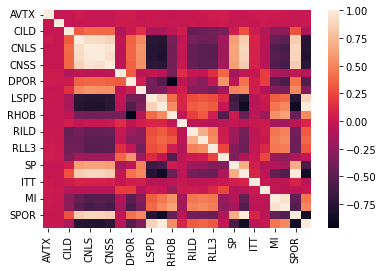

In [41]:
import seaborn as sns
sns.heatmap(file2.corr());

In [42]:
#reservoir thickness

logi = (df["GR"] <= 45) & (df['DEPT']>= 2400)
df.loc[logi,"GR"]
v = np.sum(logi)
x = df['DEPT'].to_numpy()
d = abs(x[0] - x[1])
ds = d*v
ds

567.5

In [43]:
#net to gross
(ds/700)*100

81.07142857142857

In [44]:
#ratio of hydrocarbon to clean

logi2 = (df["RILM"] >= 10)
df.loc[logi2,"RILM"]
v2 = np.sum(logi2)
x2 = df['DEPT'].to_numpy()
d2 = abs(x[0] - x[1])
ds2 = d2*v2


In [45]:
(ds2/ds)*100

73.65638766519824

In [46]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

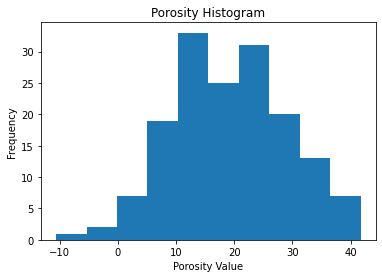

In [47]:
#plots for posrosity

import pylab 
import scipy.stats as stats
import matplotlib.pyplot as np

import pandas as pd

x1= pd.read_csv('poro_perm_data.csv')
plt.hist(x1['Porosity (%)'])
plt.xlabel('Porosity Value')
plt.ylabel('Frequency')
plt.title('Porosity Histogram')
plt.show()

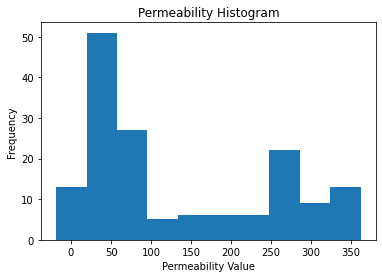

In [48]:
#plots for permeability 

x1= pd.read_csv('poro_perm_data.csv')
plt.hist(x1['Permeability (mD)'])
plt.xlabel('Permeability Value')
plt.ylabel('Frequency')
plt.title('Permeability Histogram')
plt.show()


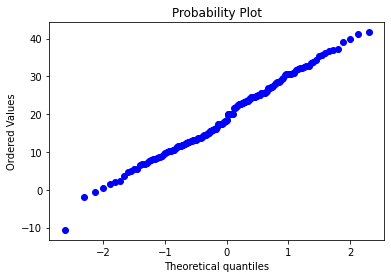

In [49]:
#cross plots - porosity

import pylab 
import scipy.stats as stats

stats.probplot(x1['Porosity (%)'], dist="norm", plot=pylab)
pylab.show()

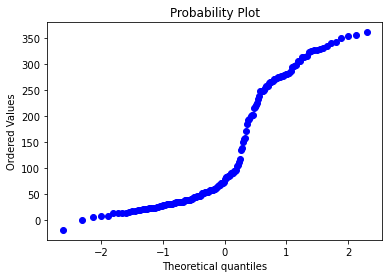

In [50]:
#cross plots - permeability

import pylab 
import scipy.stats as stats
stats.probplot(x1['Permeability (mD)'], dist="norm", plot=pylab)
pylab.show()

In [51]:
import matplotlib.pyplot as plt
import numpy as np

In [52]:
#lithostatic stress vs. depth

#extracting rho

dfRho = file2['RHOB']
rhoB = dfRho.to_numpy()

#extracting depth
dfDepth = file2['DEPT']
depth = dfDepth.to_numpy()

#converting to SI units
sc = 0.3048
depthM = depth*sc
rhoM = rhoB*1000

#removing NaNs 
rhoM = rhoM[0:7316]
depthM = depthM[0:7316]
initP = np.mean(rhoM)*depthM[0]
depthM = depthM-np.min(depthM)


#initial Pressure
lithP = []
for i in range(np.size(rhoM)-1):
    tempP = (np.mean(rhoM[0:i+1]) * np.sum(depthM[0:i+1]))
    lithP.append(tempP)
    
depthM = np.delete(depthM, 0)    

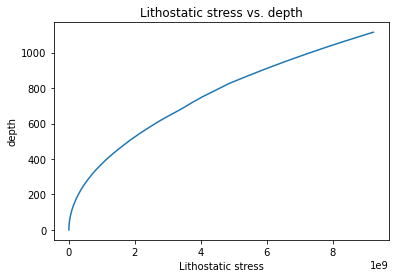

In [53]:
plt.xlabel('Lithostatic stress')
plt.ylabel('depth')
plt.title('Lithostatic stress vs. depth')

plt.plot(lithP,depthM)

# Anderson Darling Test

In [54]:
#Permeability

from scipy.stats import anderson
result = anderson(x1['Permeability (mD)'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    slevel, cvalues = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (slevel, cvalues))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (slevel, cvalues))

Statistic: nan
15.000: 0.562, data does not look normal (reject H0)
10.000: 0.641, data does not look normal (reject H0)
5.000: 0.768, data does not look normal (reject H0)
2.500: 0.896, data does not look normal (reject H0)
1.000: 1.066, data does not look normal (reject H0)


In [55]:
#Porosity

from scipy.stats import anderson
result = anderson(x1['Porosity (%)'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    slevel, cvalues = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (slevel, cvalues))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (slevel, cvalues))

Statistic: nan
15.000: 0.562, data does not look normal (reject H0)
10.000: 0.641, data does not look normal (reject H0)
5.000: 0.768, data does not look normal (reject H0)
2.500: 0.896, data does not look normal (reject H0)
1.000: 1.066, data does not look normal (reject H0)
